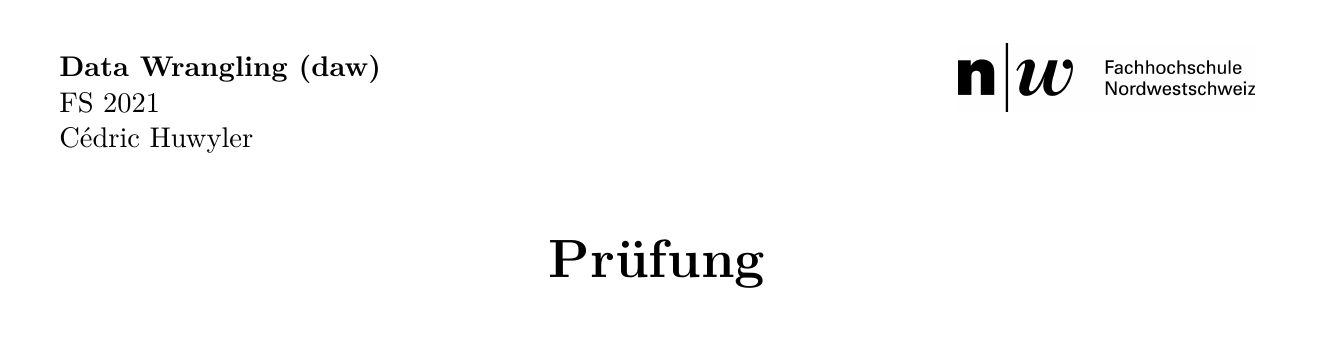

In [1]:
import pandas as pd
import numpy as np

# Aufgabe 1: Vollmondgeburten (42 Punkte)

## a)  (23 Punkte) 

Lesen Sie die Datei in ein Data Frame und bringen Sie die Daten in das Format

<br>
<div>
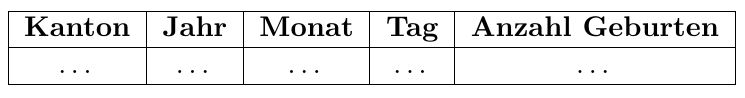
</div>

Stellen Sie sicher, dass Sie alle Verunreinigungen entfernt haben und dass keine fehlenden Werte vorkommen. Setzen Sie den Datentyp `float` für alle Spalten ausser `Kanton` (Pandas hat Probleme mit fehlenden Werten für den Datentyp `int`).

**Hinweis:** Setzen Sie geeignete Parameter `skiprows`, `nrows` und `usecols` zum Einlesen der Excel-Datei.

In [2]:
df = pd.read_excel('BFS_VitalStatistics.xlsx', skiprows=3, nrows=1378, usecols="B:QY")

In [4]:
df = df.rename(columns={'Unnamed: 1':'Jahr','Unnamed: 3':'Kanton','Unnamed: 4':'birth'})

In [5]:
df.drop(columns=('Unnamed: 2'), inplace=True)

In [6]:
# Da nicht jede Zeile das Jahr eingetragen hat
df.Jahr = df.Jahr.fillna(method='pad')

In [7]:
# Nicht benötigte spalten löschen
df.drop(columns=['birth','Day - total'], inplace=True)

In [8]:
# Umformen
df = df.melt(id_vars=['Jahr','Kanton'],var_name="Tag", value_name="Anzahl Geburten")

In [26]:
# sehr unschön, aber keine Zeit :-) 

df.drop(df[(df.Tag == '1') | (df.Tag == '2') | (df.Tag == '3') | (df.Tag == '4') | (df.Tag == '5') | (df.Tag == '6') | (df.Tag == '7') | (df.Tag == '8') | (df.Tag == '9') | (df.Tag == '10') | (df.Tag == '11') | (df.Tag == '12') | (df.Tag == '13') | (df.Tag == '14') | (df.Tag == '15') | (df.Tag == '16') | (df.Tag == '17') | (df.Tag == '18') | (df.Tag == '19') | (df.Tag == '20') | (df.Tag == '21') | (df.Tag == '22') | (df.Tag == '23') | (df.Tag == '24') | (df.Tag == '25') | (df.Tag == '26') | (df.Tag == '27') | (df.Tag == '28')| (df.Tag == '29')| (df.Tag == '30')| (df.Tag == '31') ].index, inplace=True)

df.drop(df[(df.Tag == 'No indication.1') | (df.Tag == 'No indication.2') | (df.Tag == 'No indication.3') | (df.Tag == 'No indication.4') | (df.Tag == 'No indication.5') | (df.Tag == 'No indication.6') | (df.Tag == 'No indication.7') | (df.Tag == 'No indication.8') | (df.Tag == 'No indication.9') | (df.Tag == 'No indication.10') | (df.Tag == 'No indication.11') | (df.Tag == 'No indication.12') | (df.Tag == 'No indication.13' | (df.Tag == 'No indication') ].index, inplace=True)

# somit sollte es auch gehen, dauert aber gerade sehr lange, ev weil halt wildcard search
# df.drop(df[df.Tag.str.contains('indication')].index)

In [33]:
# das geht auf einmal wiederum schnell
df.drop(df[df.Tag.str.contains('Day - ')].index, inplace=True)

## b) (6 Punkte)

Leiten Sie nun aus den Spalten *Jahr*, *Monat* und *Tag* einen Datumstring ab und bringen Sie diesen in ein geeignetes Datumsformat. Beschränken Sie das Data Frame ausserdem auf Daten nur aus der ganzen Schweiz (Kanton='Switzerland'). Am Schluss sollte ihr Data Frame im folgenden Format vorliegen:

<br>

<div>
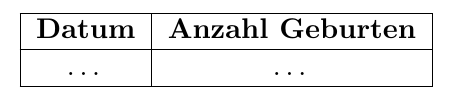
</div>

<br>

**Hinweis:** Hier können je nach Vorgehen in Teil a) invalide Datumsfelder entstehen. `pd.to_datetime()` hat die Option `errors="coerce"` um die Fehler einfach zu ignorieren und stattdessen `NaN`s zu setzen (die Sie natürlich entfernen müssen).

In [56]:
# in theory: die spalten zusammenhängen um ein datetime string zu bekommen, ich hab aber die korrekten cols noch nicht, deshalb funktioniert dies nicht

df[date] = df.Jahr.astype(str) + '-' + df.month.astype(str) + '-' df.day.astype(str)

,Jahr,Kanton,Tag,Anzahl Geburten,"(day, month)",day,month
45474,1969.0,Switzerland,1.1,233.0,"[1, 1]",NaN,NaN
45475,1969.0,Zürich,1.1,35.0,"[1, 1]",NaN,NaN
45476,1969.0,Bern / Berne,1.1,25.0,"[1, 1]",NaN,NaN
45477,1969.0,Luzern,1.1,16.0,"[1, 1]",NaN,NaN
45478,1969.0,Uri,1.1,0.0,"[1, 1]",NaN,NaN
...,...,...,...,...,...,...,...
633875,2019.0,Valais / Wallis,31.13,0.0,"[31, 13]",NaN,NaN
633876,2019.0,Neuchâtel,31.13,0.0,"[31, 13]",NaN,NaN
633877,2019.0,Genève,31.13,0.0,"[31, 13]",NaN,NaN
633878,2019.0,Jura,31.13,0.0,"[31, 13]",NaN,NaN


In [42]:
df['day','month'] = df.Tag.str.split('.')

# Ich hätte die zwar gerne so gesetzt um zwei Spalten zu bekommen, aber funktioniert nicht...
# df[['day','month']] = df.Tag.str.split('.')

45474       [1, 1]
45475       [1, 1]
45476       [1, 1]
45477       [1, 1]
45478       [1, 1]
            ...   
633875    [31, 13]
633876    [31, 13]
633877    [31, 13]
633878    [31, 13]
633879    [31, 13]
Name: Tag, Length: 555334, dtype: object

In [ ]:
# anschliessend das df[date] in ein datum umwandeln
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%M-%d', errors='coerce')

In [ ]:
# die restlichen Datumsspalten kann ich dann wieder löschen


## c) (2 Punkte)

Visualisieren Sie exemplarisch die Anzahl der Geburten pro Tag in der Schweiz (Kanton='Switzerland') im Jahr 2019. Stellen Sie dabei sicher, dass die $x$-Achse korrekt als Datum dargestellt wird.

In [ ]:
# Daten nur aus der Schweiz
df_swiss = df[df.Kanton == 'Switzerland']

## d) (7 Punkte)

In der Datei `'mondphasen.csv'` finden Sie für jedes Datum seit 1970 die zugehörige Mondphase, benannt nach dem folgenden Schema:

<br>

<div>
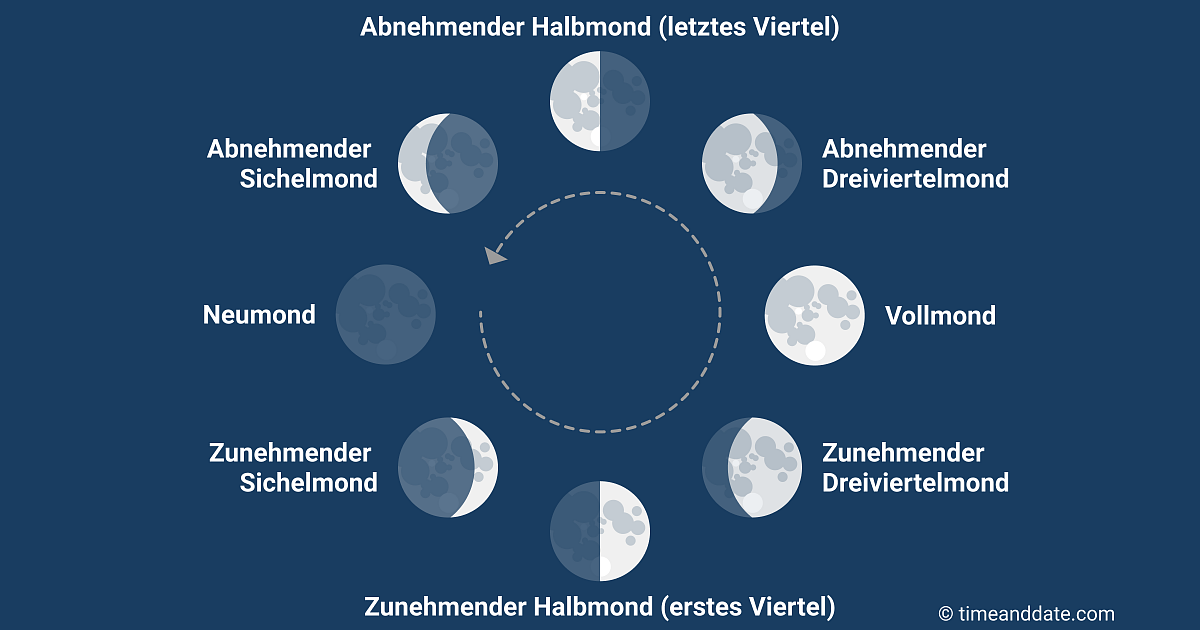
</div>

<br>

Berechnen Sie nun die durchschnittliche Anzahl der Geburten in der Schweiz pro Mondphase seit 1970. Sehen Sie einen signifikanten Unterschied? (ohne auf statistische Tests zurückzugreifen) Natürlich müssten wir hier eine vertiefte Analyse durchführen, um sauber argumentieren zu können, aber einen ersten Eindruck können wir damit gut gewinnen.

In [63]:
mond = pd.read_csv('mondphasen.csv')

In [ ]:
mond['datetime'] = pd.to_datetime(mond['Datum'], format='%Y-%M-%d', errors='coerce')

In [ ]:
mond.datetime.isna().sum()

In [ ]:
# Nun würde ich dies joinen, hätte ich den die korrekten Daten im anderen Df
df_merged = pd.merge(df, mond, on = 'datetime', how = 'inner')

## e) (4 Punkte)

Visualisieren Sie nun die durchschnittliche Anzahl der Geburten pro Wochentag über die Jahre hinweg. Finden Sie ein Muster?

# Aufgabe 2: Covid-Test-Triage (23 Punkte)

## a) (1 Punkt)

Lesen Sie die Datei in ein Data Frame ein.

In [61]:
covid = pd.read_csv('corona_tests.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [62]:
covid.head(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


## b) (3 Punkte)

Verschaffen Sie sich einen ersten Überblick über die Daten. Geben Sie dazu die verschiedenen (einzigartigen) Ausprägungen aller Merkmale ausser dem Datum aus.

In [63]:
for col in covid.columns[1:]:
    print(col, covid[col].unique())

cough [0 1 '0' '1' 'None']
fever [0 1 '0' '1' 'None']
sore_throat [0 1 '0' '1' 'None']
shortness_of_breath [0 1 '0' '1' 'None']
head_ache [0 1 '0' '1' 'None']
corona_result ['negative' 'positive' 'other']
age_60_and_above ['None' 'Yes' 'No']
gender ['female' 'male' 'None']
test_indication ['Other' 'Abroad' 'Contact with confirmed']


## c) (4 Punkte)

Setzen Sie für jede Spalte einen sinnvollen Datentyp entsprechend den Ausprägungen. Stellen Sie dabei sicher, dass fehlende Werte auch sauber als solche gekennzeichnet sind. 

**Hinweis:** Der Integer-Datentyp von Pandas kann nicht mit fehlenden Werten umgehen, hier dürfen Sie stattdessen Float verwenden.

In [64]:
c = ['cough','fever','sore_throat','head_ache',]
for cols in c:
    covid[cols] = covid[cols].replace('None',np.nan)
    covid[cols] = covid[cols].astype('float')

covid['corona_result'] = pd.Categorical(covid.corona_result, categories=['negative','positive','other'], ordered=False)
covid['age_60_and_above'] = pd.Categorical(covid.age_60_and_above, categories=['Yes','No'], ordered=False)
covid['gender'] = pd.Categorical(covid.gender, categories=['female','male'], ordered=False)



## d) (2 Punkte)

Wieviele Werte fehlen pro Spalte? Geben Sie Ihre Resultate absolut und in Prozent aus. 

In [65]:
covid.isna().sum()

test_date                   0
cough                     252
fever                     252
sore_throat                 1
shortness_of_breath         0
head_ache                   1
corona_result               0
age_60_and_above       127320
gender                  19563
test_indication             0
dtype: int64

In [66]:
covid.isna().sum() * 100 / covid.shape[0]

test_date               0.000000
cough                   0.090372
fever                   0.090372
sore_throat             0.000359
shortness_of_breath     0.000000
head_ache               0.000359
corona_result           0.000000
age_60_and_above       45.659284
gender                  7.015650
test_indication         0.000000
dtype: float64

## e) (3 Punkte)

Das Feld `'corona_result'` ist für statistische Analysen einfacher zu verwenden, wenn Sie 'negative' mit einer 0, 'positive' mit einer 1 und 'other' mit einem fehlenden Wert repräsentieren. Passen Sie Ihr Data Frame entsprechend an und verfahren Sie im gleichen Stil mit `'age_60_and_above'`.

In [67]:
c = ['corona_result','age_60_and_above']
for col in c:
    covid[col] = covid[col].replace(0,'negative')
    covid[col] = covid[col].replace(1,'positive')
    covid[col] = covid[col].replace('other',np.nan)

In [68]:
covid.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0,0.0,negative,NaN,male,Other


## f) (3 Punkte)

Untersuchen Sie die Variable `'test_indication'`. Welche der drei möglichen Test-Indikationen korrespondiert prozentual mit am meisten positiven Testergebnissen?

In [79]:
covid.groupby('test_indication')['corona_result'].count() * 100 / covid.shape[0]

test_indication
Abroad                     8.991996
Contact with confirmed     3.757603
Other                     85.854659
Name: corona_result, dtype: float64

Antwort: Other mit 85%

## g) (3 Punkte)

Im folgenden möchten wir nur die Symptome 'cough', 'fever', 'sore_throat', 'shortness_of_breath' und 'head_ache' untersuchen. Berechnen Sie das durchschnittliche Auftreten in Prozent dieser Symptome für getestete Personen mit und ohne Covid19. Überlegen Sie sich eine Reihenfolge, wie Sie die einzelnen Symptome priorisieren würden.

In [83]:
cols = ['cough','fever','sore_throat','shortness_of_breath','head_ache'] 
for col in cols:
    print(col, covid.groupby(col)['corona_result'].count())

cough cough
0.0    233133
1.0     41571
Name: corona_result, dtype: int64
fever fever
0.0    253329
1.0     21375
Name: corona_result, dtype: int64
sore_throat sore_throat
0.0    273063
1.0      1892
Name: corona_result, dtype: int64
shortness_of_breath shortness_of_breath
0       257500
1         1048
0        15906
1          501
None         1
Name: corona_result, dtype: int64
head_ache head_ache
0.0    272572
1.0      2383
Name: corona_result, dtype: int64


## h) (4 Punkte)

Sie möchten gerne ein ML-Modell trainieren, das versucht, aus den gegebenen Input-Features das Testresultat vorherzusagen. Ein sehr grosser Teil der Spalte `'age_60_and_above'` fehlt jedoch, darum möchte man eher auf das Entfernen der Spalten mit den fehlenden Werten verzichten. Nennen Sie zwei konkrete Strategien, wie man mit fehlenden Werten umgehen könnte. Was sind ihre Vor- und Nachteile?

1. Möglichkeit: Imputation mittels KNN. Hierbei werden die K ähnlichsten Fälle verwendet um ein entsprechendes Resulat "vorherzusagen. Allfällige Biases werden verstärkt
2. Möglichkeit: mean, median, sdv. Funktioniert jedoch nur mit numerischen Werten